In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

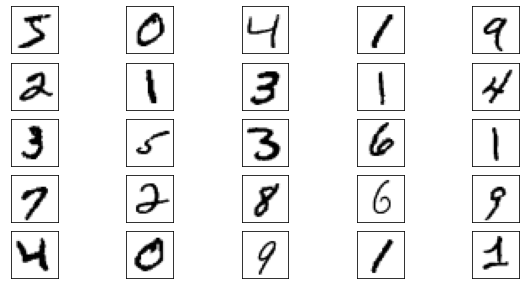

In [5]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 23s 9ms/step - loss: 0.2828 - accuracy: 0.9199 - val_loss: 0.1556 - val_accuracy: 0.9557
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1273 - accuracy: 0.9626 - val_loss: 0.1152 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0899 - accuracy: 0.9736 - val_loss: 0.0965 - val_accuracy: 0.9702
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0921 - val_accuracy: 0.9736
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0926 - val_accuracy: 0.9729


In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 7ms/step - loss: 0.0822 - accuracy: 0.9766


[0.08217599242925644, 0.9765999913215637]

[[2.4166681e-08 6.7761680e-10 2.0589546e-06 8.7030101e-05 1.3129100e-12
  7.4219017e-08 2.5899059e-14 9.9990940e-01 1.6921071e-07 1.1847657e-06]]
7


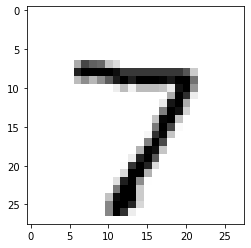

In [10]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [11]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [12]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = y_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(234, 28, 28)


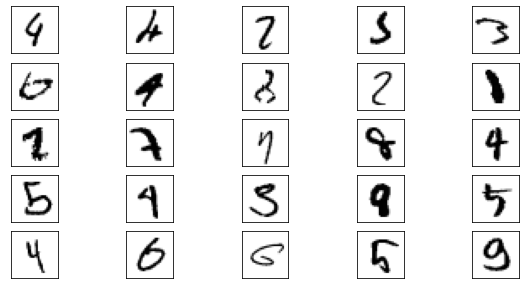

In [13]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

Значение сети: 9


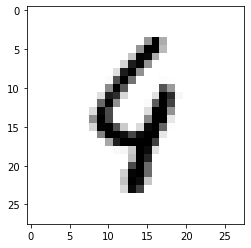

Значение сети: 6


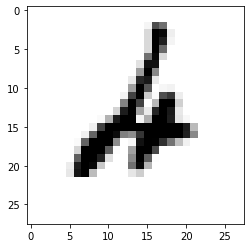

Значение сети: 7


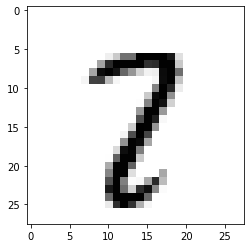

Значение сети: 3


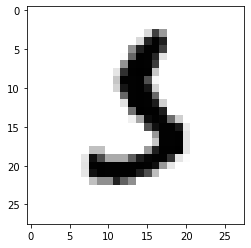

Значение сети: 7


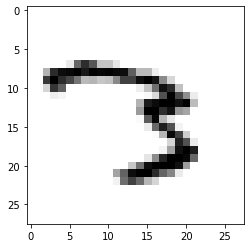

In [14]:
for i in range(5):
    print(f'Значение сети: {p_false[i]}')
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [15]:
# https://www.youtube.com/watch?v=oCXh_GFMmOE&list=WL&index=27
# https://www.youtube.com/watch?v=CEUNTRdLhKk
# https://github.com/selfedu-rus/neural-network/blob/master/lesson%208.%20keras_digits.py
# https://github.com/selfedu-rus/neural-network/blob/master/lesson%2014.%20CNN.py
# https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks
# https://habr.com/ru/companies/skillfactory/articles/552394/
# https://habr.com/ru/companies/ods/articles/714670/
# https://www.youtube.com/watch?v=UXB9bFj-UA4&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh&index=4

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [18]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [19]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )


(60000, 28, 28, 1)


In [20]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 50s 17ms/step - loss: 0.1407 - accuracy: 0.9560 - val_loss: 0.0648 - val_accuracy: 0.9809
Epoch 2/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 3/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 4/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 5/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0351 - val_accuracy: 0.9901


In [23]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 5s 15ms/step - loss: 0.0280 - accuracy: 0.9917


[0.027972372248768806, 0.9916999936103821]

In [24]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-2.33239457e-02,  1.09048404e-01, -1.57903180e-01,
           -7.87922740e-02, -4.39181700e-02, -1.07493080e-01,
           -1.22682922e-01, -2.69268423e-01,  2.77675658e-01,
            1.24688577e-02, -1.59549698e-01, -7.77317025e-03,
           -1.86677173e-01,  1.26592636e-01, -1.15908191e-01,
            9.43574533e-02,  6.26976267e-02,  1.85085282e-01,
            2.98688766e-02,  6.90209270e-02, -2.87332714e-01,
            3.14801224e-02, -2.07002074e-01,  5.58711030e-02,
            1.11695267e-01, -1.49058908e-01,  1.46359175e-01,
            1.63869560e-01,  6.73924088e-02, -1.41827874e-02,
           -1.92322269e-01, -5.37034720e-02]],
 
         [[-2.42776603e-01,  1.57529250e-01, -1.96498543e-01,
           -7.42759258e-02, -3.69016469e-01,  3.44457701e-02,
           -8.83044079e-02, -2.31558830e-01, -2.79946148e-01,
            2.18690038e-01, -3.27348262e-01,  1.78173870e-01,
         

In [25]:
activation_model = keras.Model(inputs=model.input, outputs=model.layers[0].output)
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [26]:
test_img = np.expand_dims(x_test[23], axis=0)
activation = activation_model.predict(test_img)
print(activation.shape)

(1, 28, 28, 32)


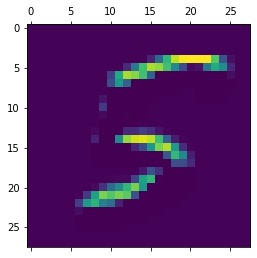

In [32]:
plt.matshow(activation[0, :, :, 3], cmap='viridis')

16
2


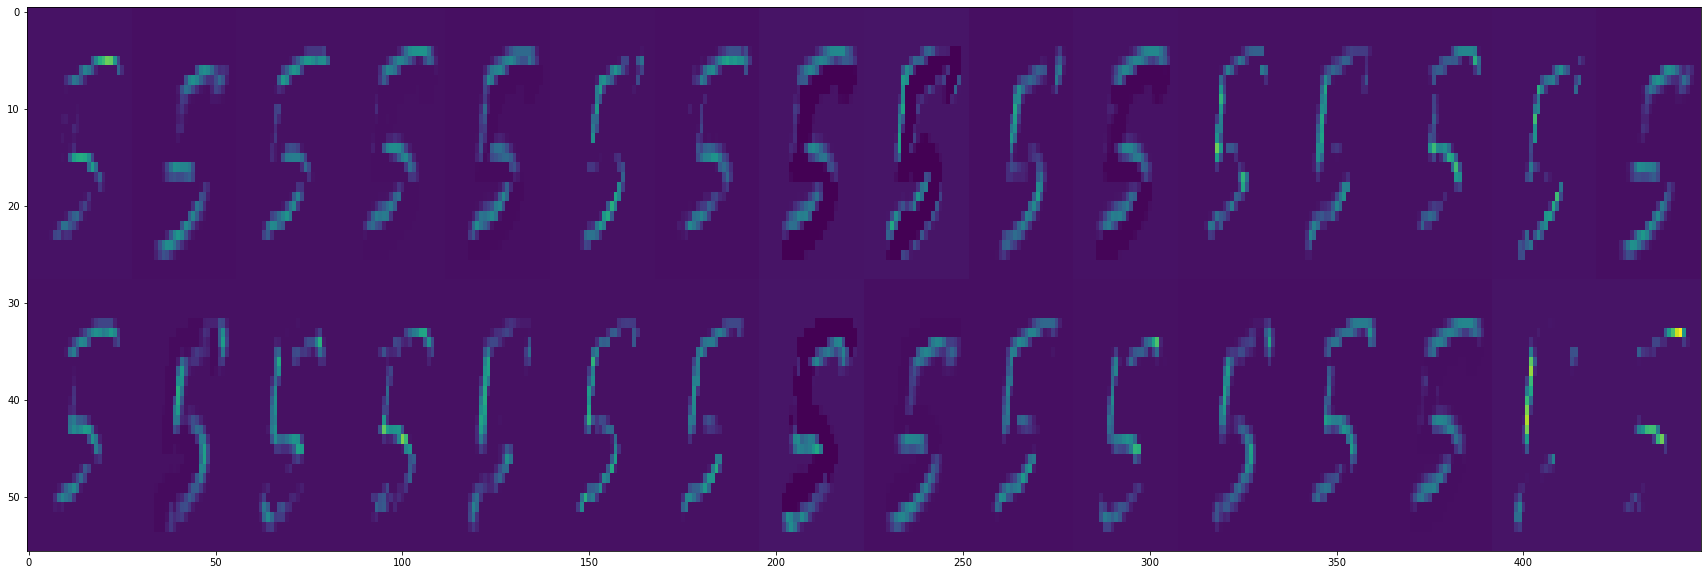

In [69]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_rows = n_filters // images_per_row
display_grid = np.zeros((n_rows * size, images_per_row * size))
print(images_per_row)
print(n_rows)
for row in range(2):
    for col in range(16):
        channel_image = activation[0, :, :, row * images_per_row + col]
        # channel_image -= channel_image.mean()
        # channel_image /= channel_image.std()
        # channel_image *= 64
        # channel_image += 128
        # channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[row * size : (row + 1) * size, col * size : (col + 1) * size] = channel_image
scale = 1. / size
#plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.figure(figsize=(30,10))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')